> ## NOTE: You are not allowed to use any propriety functions from this notebook in your projects. 

# Mod 4 Appendix: Deep NLP

- Bonus Office Hours S.G.
- 12/09/10
- online-ds-ft-081720

## Learning Objectives

- Discuss word Embeddings and their advantages
- Training Word2Vec models
- Using pretrained word embeddings


- Create a Classification Model for true-trump ("Twitter for Android") vs trump-staffer("Twitter for iPhone - from period of time when android was still in use)

    - Use lesson's W2Vec class in Sci-kit learn models
    - Use LSTMs
    - Use RNN/GRUs






- Compare:
    1.  Mean embeddings vs count/tfidf data with scikit learn.
    

<!-- ## References

- My Work-in-Progress Capstone v2.0 Notebook:
    - [GitHub Notebook Link](https://github.com/jirvingphd/capstone-project-using-trumps-tweets-to-predict-stock-market/blob/WIP/Capstone%20Restarted%2010-2020.ipynb) -->

## NLP & Word Vectorization

> **_Natural Language Processing_**, or **_NLP_**, is the study of how computers can interact with humans through the use of human language.  Although this is a field that is quite important to Data Scientists, it does not belong to Data Science alone.  NLP has been around for quite a while, and sits at the intersection of *Computer Science*, *Artificial Intelligence*, *Linguistics*, and *Information Theory*. 

# Word Embeddings

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-word-embeddings-online-ds-ft-100719/master/images/embeddings.png">

- Convert words into a vector space
    + Mathematical object
- It's all about closeness
    + Distributional Hypothesis: https://en.wikipedia.org/wiki/Distributional_semantics#Distributional_hypothesis

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-word-embeddings-online-ds-ft-100719/master/images/vectors.png">

## Resources

- Kaggle Tutorial:  https://www.kaggle.com/learn/embeddings
- Google Embedding Crash Course: https://developers.google.com/machine-learning/crash-course/embeddings

## Word2Vec

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-using-word2vec-online-ds-ft-100719/master/images/training_data.png">

### Skip-Gram Model

- Train the MLP to find the best weights (context) to map word-to-word
- But since words close to another usually contain context, we're _really_ teaching it context in those weights
- Gut check: similar contexted words can be exchanged
    + EX: "A fluffy **dog** is a great pet" <--> "A fluffy **cat** is a great pet"

- By training a text-generation model, we wind up with a lookup table where each word has its own vector 

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-using-word2vec-online-ds-ft-100719/master/images/new_skip_gram_net_arch.png">


<img src="https://raw.githubusercontent.com/learn-co-students/dsc-using-word2vec-online-ds-ft-100719/master/images/new_word2vec_weight_matrix_lookup_table.png">

## GloVe - Global Vectors for Word Representation

### Transfer Learning

- Usually embeddings are hundreds of dimensions
- Just use the word embeddings already learned from before!
    + Unless very specific terminology, context will likely carry within language
- Comparable to CNN transfer learning

# Sequence Models - Recurrent Neural Networks

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-understanding-recurrent-neural-networks-online-ds-ft-100719/master/images/unrolled.gif">

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-sequence-model-use-cases-online-ds-ft-100719/master/images/rnn.gif">

## LSTMs & GRUs

- GRU (Gated Recurrent Units (GRUs)
    - Reset Gate
    - Update Gate
    
- LSTM (Long Short Term Memory Cells)
   - Input Gate
   - Forget Gate
   - Output Gate

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-sequence-model-use-cases-online-ds-ft-100719/master/images/RNN-unrolled.png">

Each word will have a vector of contexts: the embeddings!

# Activity: Creating Word Embeddings with Trump's Tweets

In [1]:
from tensorflow.random import set_seed
set_seed(321)

import numpy as np 
np.random.seed(321)

In [2]:
# !pip install -U fsds
from fsds.imports import *

fsds v0.2.27 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [3]:
df = fs.datasets.load_nlp_finding_trump(read_csv_kwds={'parse_dates':['created_at'],
                                                      'index_col':'created_at'})
df.sort_index(inplace=True)
df

,source,text,retweet_count,favorite_count,is_retweet,id_str
created_at,,,,,,
2016-12-01 14:37:57,Twitter for iPhone,My thoughts and prayers are with those affecte...,12077,65724,False,804333718999539712
2016-12-01 14:38:09,Twitter for Android,Getting ready to leave for the Great State of ...,9834,57249,False,804333771021570048
2016-12-01 22:52:10,Twitter for iPhone,Heading to U.S. Bank Arena in Cincinnati Ohio ...,5564,31256,False,804458095569158144
2016-12-02 02:45:18,Twitter for iPhone,Thank you Ohio! Together we made history – and...,17283,72196,False,804516764562374656
2016-12-03 00:44:20,Twitter for Android,The President of Taiwan CALLED ME today to wis...,24700,111106,False,804848711599882240
...,...,...,...,...,...,...
2020-01-01 01:17:43,Twitter for iPhone,RT @SenJohnKennedy: I think Speaker Pelosi is ...,8893,0,True,1212181071988703232
2020-01-01 01:18:47,Twitter for iPhone,RT @DanScavino: https://t.co/CJRPySkF1Z,10796,0,True,1212181341078458369
2020-01-01 01:22:28,Twitter for iPhone,Our fantastic First Lady! https://t.co/6iswto4WDI,27567,132633,False,1212182267113680896


## Training Word2Vec

### Resources:

- Two Part Word2Vec Tutorial  (linked from Learn)
    - [Part 1: The Skip-Gram Model](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)
    - [Part 2: Negative Sampling](http://mccormickml.com/2017/01/11/word2vec-tutorial-part-2-negative-sampling/)


- `sentences`: dataset to train on
- `size`: how big of a word vector do we want
- `window`: how many words around the target word to train with
- `min_count`: how many times the word shows up in corpus; we don't want words that are rarely used
- `workers`: number of threads (individual task "workers")

```python
from gensim.models import Word2Vec

# Let's assume we have our text corpus already tokenized and stored inside the variable 'data'--the regular text preprocessing steps still need to be handled before training a Word2Vec model!

model = Word2Vec(data, size=100, window=5, min_count=1, workers=4)

model.train(data, total_examples=model.corpus_count)
```

In [4]:
from nltk import word_tokenize, TweetTokenizer
from gensim.utils import simple_preprocess

In [5]:
## TRAINING WORD2VEC FROM FULL DF NOT JUST TARGETS
data_lower = df['text'].map(lambda x: simple_preprocess(x,deacc=True,
                                                        max_len=100))
print(df.iloc[0]['text'])
data_lower[0]

My thoughts and prayers are with those affected by the tragic storms and tornadoes in the Southeastern United States. Stay safe!


['my',
 'thoughts',
 'and',
 'prayers',
 'are',
 'with',
 'those',
 'affected',
 'by',
 'the',
 'tragic',
 'storms',
 'and',
 'tornadoes',
 'in',
 'the',
 'southeastern',
 'united',
 'states',
 'stay',
 'safe']

In [6]:
from gensim.models import Word2Vec

In [7]:
model = Word2Vec(data_lower,size=100,window=5,min_count=3,workers=4)
model

In [8]:
model.train(data_lower, total_examples=model.corpus_count,epochs=10)

(2713927, 3665260)

In [9]:
wv = model.wv
wv

In [10]:
# help(wv)

In [11]:
wv['republican']

array([ 1.796414  , -0.04325588, -1.9670781 ,  2.5129035 , -0.06302256,
        0.7794397 ,  0.7600296 , -1.3125579 , -1.6454532 , -0.15936007,
        0.62867975, -1.21811   , -0.0215866 ,  0.5799764 , -0.02625835,
       -0.84928405,  2.453802  ,  0.3890533 ,  2.2323852 , -1.0360491 ,
       -0.6399379 ,  0.4596346 , -0.69605196, -0.5929525 ,  0.1875119 ,
        1.7653544 ,  0.92935264,  3.7640343 ,  2.0188546 , -1.8414725 ,
        1.7439743 ,  0.85399246, -0.45605636,  0.63408697, -1.3402935 ,
        0.15633711, -0.80665344,  0.8332697 , -1.5175813 ,  3.5623171 ,
        0.55518687,  1.7355837 , -1.6675817 ,  2.1732621 , -0.57164437,
        0.23936076,  0.97974753, -0.2252576 , -0.8065781 ,  2.1152546 ,
       -0.0750004 ,  0.7057573 ,  0.8032535 ,  0.76072544,  0.15455149,
        0.45199323, -0.6353287 , -1.014991  ,  0.09060059,  0.5466377 ,
        0.9672794 ,  0.07797675, -2.4151201 ,  0.2988884 , -0.3930609 ,
        2.6163452 , -1.8562076 , -0.59357214, -2.001092  , -0.24

In [12]:
wv.most_similar('republican')

[('party', 0.751314103603363),
 ('senators', 0.750078558921814),
 ('democrat', 0.7445011138916016),
 ('candidates', 0.6989469528198242),
 ('primary', 0.6017158627510071),
 ('senate', 0.5988650918006897),
 ('vote', 0.5816258788108826),
 ('opposition', 0.5798185467720032),
 ('republicans', 0.5706425309181213),
 ('race', 0.5563269853591919)]

In [13]:
wv.most_similar(negative=['democrat'])

[('japan', 0.3985143303871155),
 ('chinese', 0.3793366551399231),
 ('bilateral', 0.35291966795921326),
 ('kept', 0.3526450991630554),
 ('co', 0.35051214694976807),
 ('kim', 0.3476097583770752),
 ('beef', 0.3467005789279938),
 ('happy', 0.3374243974685669),
 ('signing', 0.31957924365997314),
 ('storm', 0.3192926049232483)]

#### Word2Vec params

```python
## For initializing model
sentences=None,
    size=100,
    alpha=0.025,
    window=5,
    min_count=5,
    max_vocab_size=None,
    sample=0.001,
    seed=1,
    workers=3,
    min_alpha=0.0001,
    sg=0,
    hs=0,
    negative=5,
    cbow_mean=1,
    hashfxn=<built-in function hash>,
    iter=5,
    null_word=0,
    trim_rule=None,
    sorted_vocab=1,
    batch_words=10000,
    compute_loss=False,
    callbacks=(),
    
    
## For training 
    sentences,
    total_examples=None,
    total_words=None,
    epochs=None,
    start_alpha=None,
    end_alpha=None,
    word_count=0,
    queue_factor=2,
    report_delay=1.0,
    compute_loss=False,
    callbacks=(),
    ```

In [14]:
# ### USING WORD VECTOR MATH TO GET A FEEL FOR QUALITY OF MODE
def word_math(wv,pos_words=['hillary'],neg_words=['bill'],
              verbose=True,return_vec=False):
    if isinstance(pos_words,str):
        pos_words=[pos_words]
    if isinstance(neg_words,str):
        neg_words=[neg_words]


    pos_eqn = '+'.join(pos_words)
    neg_eqn = '-'.join(neg_words)

    print('---'*15)    
    print(f"[i] Result for:\t{pos_eqn}{' - '+neg_eqn if len(neg_eqn)>0 else ' '}")
    print('---'*15)

    answer = wv.most_similar(positive=pos_words,negative=neg_words)
    
    if verbose:
          [print(f"- {ans[0]} ({round(ans[1],3)})") for ans in answer]
          print('---'*15,'\n\n')

    if return_vec: 
          return answer
    

In [15]:
equation_list=[(['america','crime'],[]),
               
               (['democrats','russia'],[]),
               (['republican'],['honor']),
               (['man','power'],[]),
               (['russia','honor'],[]),
              (['china','tariff'])]

for eqn in equation_list:
#     print('\n\n')
    word_math(wv,*eqn)
#     word_math(wv2,*eqn)

---------------------------------------------
[i] Result for:	america+crime 
---------------------------------------------
- borders (0.748)
- tough (0.601)
- strong (0.578)
- strength (0.564)
- ineffective (0.56)
- weak (0.549)
- choice (0.535)
- amendment (0.533)
- agenda (0.524)
- vets (0.517)
--------------------------------------------- 


---------------------------------------------
[i] Result for:	democrats+russia 
---------------------------------------------
- dems (0.748)
- facts (0.681)
- russian (0.668)
- hoax (0.663)
- russians (0.661)
- corruption (0.65)
- dnc (0.624)
- collusion (0.618)
- mueller (0.594)
- phony (0.591)
--------------------------------------------- 


---------------------------------------------
[i] Result for:	republican - honor
---------------------------------------------
- democrat (0.638)
- dem (0.605)
- party (0.57)
- liberal (0.565)
- senators (0.559)
- republicans (0.543)
- dems (0.513)
- votes (0.469)
- credibility (0.451)
- conservative (0.44

### Using Pre-Trained Vectors

In [16]:
import os
folder = '/Users/jamesirving/Datasets/'#glove.twitter.27B/'
# print(os.listdir(folder))
glove_file = folder+'glove.6B/glove.6B.50d.txt'#'glove.twitter.27B.50d.txt'
glove_twitter_file = folder+'glove.twitter.27B/glove.twitter.27B.50d.txt'
print(glove_file)
print(glove_twitter_file)

/Users/jamesirving/Datasets/glove.6B/glove.6B.50d.txt
/Users/jamesirving/Datasets/glove.twitter.27B/glove.twitter.27B.50d.txt


#### Keeping only the vectors needed

In [17]:
# ## This line of code for getting all words bugs me
# total_vocabulary = set(word for tweet in data_lower for word in tweet)
# len(total_vocabulary)

In [18]:
# glove = {}
# with open(glove_file,'rb') as f:#'glove.6B.50d.txt', 'rb') as f:
#     for line in f:
#         parts = line.split()
#         word = parts[0].decode('utf-8')
#         if word in total_vocabulary:
#             vector = np.array(parts[1:], dtype=np.float32)
#             glove[word] = vector

In [19]:
# glove['republican']

### Converting Glove to Word2Vec format

- Getting glove into w2vec format:
    - https://radimrehurek.com/gensim/scripts/glove2word2vec.html

In [20]:
glove_folder = folder+'glove.twitter.27B'
os.listdir(glove_folder)

['glove.twitter.27B.100d.txt',
 'glove.twitter.27B.50d.txt',
 'glove_to_w2vec.txt',
 'glove.twitter.27B.25d.txt',
 'glove.twitter.27B.200d.txt']

In [21]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file = datapath(glove_twitter_file)
tmp_file = get_tmpfile(glove_folder+'glove_to_w2vec.txt')
_ = glove2word2vec(glove_file, tmp_file)
model_glove = KeyedVectors.load_word2vec_format(tmp_file)

In [22]:
model_glove.wv

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



In [23]:
## Using pre-trained embeddings for math
equation_list=[(['america','crime'],[]),
               
               (['democrats','russia'],[]),
               (['republican'],['honor']),
               (['man','power'],[]),
               (['russia','honor'],[]),
              (['china','tariff'])]

for eqn in equation_list:
#     print('\n\n')
    word_math(model_glove,*eqn)

---------------------------------------------
[i] Result for:	america+crime 
---------------------------------------------
- american (0.849)
- country (0.811)
- criminal (0.805)
- society (0.8)
- africa (0.794)
- death (0.793)
- the (0.792)
- world (0.789)
- states (0.788)
- attack (0.784)
--------------------------------------------- 


---------------------------------------------
[i] Result for:	democrats+russia 
---------------------------------------------
- republicans (0.869)
- conservatives (0.841)
- ukraine (0.839)
- government (0.835)
- americans (0.831)
- liberals (0.821)
- britain (0.816)
- u.s. (0.814)
- immigration (0.813)
- states (0.81)
--------------------------------------------- 


---------------------------------------------
[i] Result for:	republican - honor
---------------------------------------------
- tsx (0.656)
- trinamool (0.654)
- nesunan (0.653)
- mantashe (0.639)
- mutungan (0.637)
- مقدسي (0.634)
- nyambungan (0.633)
- مسئولون (0.628)
- melumelu (0.628

## Text Classification - Finding Trump

In [24]:
## Getting time period with android tweets
droid_ts = df[df['source'] == 'Twitter for Android'].index
find_trump = df.loc[droid_ts[0]:droid_ts[-1]].copy()

## Getting only original-text (not retweets)
find_trump = find_trump[find_trump['is_retweet']==False]
find_trump

,source,text,retweet_count,favorite_count,is_retweet,id_str
created_at,,,,,,
2016-12-01 14:38:09,Twitter for Android,Getting ready to leave for the Great State of ...,9834,57249,False,804333771021570048
2016-12-01 22:52:10,Twitter for iPhone,Heading to U.S. Bank Arena in Cincinnati Ohio ...,5564,31256,False,804458095569158144
2016-12-02 02:45:18,Twitter for iPhone,Thank you Ohio! Together we made history – and...,17283,72196,False,804516764562374656
2016-12-03 00:44:20,Twitter for Android,The President of Taiwan CALLED ME today to wis...,24700,111106,False,804848711599882240
2016-12-03 01:41:30,Twitter for Android,Interesting how the U.S. sells Taiwan billions...,38805,122905,False,804863098138005504
...,...,...,...,...,...,...
2017-03-24 17:03:46,Twitter for iPhone,Today I was pleased to announce the official a...,12933,66692,False,845320243614547968
2017-03-24 17:59:42,Twitter for iPhone,Today I was thrilled to announce a commitment ...,20212,89339,False,845334323045765121
2017-03-25 13:29:17,Twitter for iPhone,Happy #MedalOfHonorDay to our heroes! ➡️https:...,14139,68302,False,845628655493677056


In [25]:
def is_trump(x):
    return 'Trump' if x =='Twitter for Android' else 'Not Trump'
find_trump['is_trump'] = find_trump['source'].map(is_trump)
find_trump['is_trump'].value_counts(dropna=False,normalize=True)

Trump        0.619048
Not Trump    0.380952
Name: is_trump, dtype: float64

In [26]:
target_map = {'Not Trump':0,'Trump':1}

find_trump['target'] = find_trump['is_trump'].map(target_map)
find_trump

,source,text,retweet_count,favorite_count,is_retweet,id_str,is_trump,target
created_at,,,,,,,,
2016-12-01 14:38:09,Twitter for Android,Getting ready to leave for the Great State of ...,9834,57249,False,804333771021570048,Trump,1
2016-12-01 22:52:10,Twitter for iPhone,Heading to U.S. Bank Arena in Cincinnati Ohio ...,5564,31256,False,804458095569158144,Not Trump,0
2016-12-02 02:45:18,Twitter for iPhone,Thank you Ohio! Together we made history – and...,17283,72196,False,804516764562374656,Not Trump,0
2016-12-03 00:44:20,Twitter for Android,The President of Taiwan CALLED ME today to wis...,24700,111106,False,804848711599882240,Trump,1
2016-12-03 01:41:30,Twitter for Android,Interesting how the U.S. sells Taiwan billions...,38805,122905,False,804863098138005504,Trump,1
...,...,...,...,...,...,...,...,...
2017-03-24 17:03:46,Twitter for iPhone,Today I was pleased to announce the official a...,12933,66692,False,845320243614547968,Not Trump,0
2017-03-24 17:59:42,Twitter for iPhone,Today I was thrilled to announce a commitment ...,20212,89339,False,845334323045765121,Not Trump,0
2017-03-25 13:29:17,Twitter for iPhone,Happy #MedalOfHonorDay to our heroes! ➡️https:...,14139,68302,False,845628655493677056,Not Trump,0


In [27]:
df = find_trump[['text','is_trump','target']]
df

,text,is_trump,target
created_at,,,
2016-12-01 14:38:09,Getting ready to leave for the Great State of ...,Trump,1
2016-12-01 22:52:10,Heading to U.S. Bank Arena in Cincinnati Ohio ...,Not Trump,0
2016-12-02 02:45:18,Thank you Ohio! Together we made history – and...,Not Trump,0
2016-12-03 00:44:20,The President of Taiwan CALLED ME today to wis...,Trump,1
2016-12-03 01:41:30,Interesting how the U.S. sells Taiwan billions...,Trump,1
...,...,...,...
2017-03-24 17:03:46,Today I was pleased to announce the official a...,Not Trump,0
2017-03-24 17:59:42,Today I was thrilled to announce a commitment ...,Not Trump,0
2017-03-25 13:29:17,Happy #MedalOfHonorDay to our heroes! ➡️https:...,Not Trump,0


___ 

___

## Using Embeddings in Classification

### Embedding Layers
You should make note of a couple caveats that come with using embedding layers in your neural network -- namely:

* The embedding layer must always be the first layer of the network, meaning that it should immediately follow the `Input()` layer 
* All words in the text should be integer-encoded, with each unique word encoded as it's own unique integer  
* The size of the embedding layer must always be greater than the total vocabulary size of the dataset! The first parameter denotes the vocabulary size, while the second denotes the size of the actual word vectors
* The size of the sequences passed in as data must be set when creating the layer (all data will be converted to padded sequences of the same size during the preprocessing step) 


[Keras Documentation for Embedding Layers](https://keras.io/layers/embeddings/).

## Using Embedding Layers in ANN

In [28]:
## IMPORTING PYTHON FILE
import os,sys
sys.path.append("../")
import keras_gridsearch as kg


## Auto-reload mpdule 
%load_ext autoreload
%autoreload 2

In [29]:
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding
from tensorflow.keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Sequential
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint


from keras.preprocessing import text, sequence
from keras.utils import to_categorical
# from keras.preprocessing.sequence import pad_sequences

In [30]:
df

,text,is_trump,target
created_at,,,
2016-12-01 14:38:09,Getting ready to leave for the Great State of ...,Trump,1
2016-12-01 22:52:10,Heading to U.S. Bank Arena in Cincinnati Ohio ...,Not Trump,0
2016-12-02 02:45:18,Thank you Ohio! Together we made history – and...,Not Trump,0
2016-12-03 00:44:20,The President of Taiwan CALLED ME today to wis...,Trump,1
2016-12-03 01:41:30,Interesting how the U.S. sells Taiwan billions...,Trump,1
...,...,...,...
2017-03-24 17:03:46,Today I was pleased to announce the official a...,Not Trump,0
2017-03-24 17:59:42,Today I was thrilled to announce a commitment ...,Not Trump,0
2017-03-25 13:29:17,Happy #MedalOfHonorDay to our heroes! ➡️https:...,Not Trump,0


In [31]:
from keras.preprocessing import text,sequence
from sklearn.model_selection import train_test_split
from nltk import word_tokenize
from gensim.utils import simple_preprocess
from sklearn import metrics

X = df['text']
y_t = to_categorical(df['target'])
y_t

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [32]:
MAX_WORDS = 25000
MAX_SEQUENCE_LENGTH = 50

tokenizer = text.Tokenizer(num_words=MAX_WORDS)

tokenizer.fit_on_texts(X) #df['text'])
sequences = tokenizer.texts_to_sequences(X) #df['text'])
max(list(map(lambda x: len(x),sequences)))

31

In [33]:
X_t = sequence.pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_t.shape

(588, 50)

In [34]:
X_t[-1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,  169, 2705,   16,  134,
         95,   20,  211,   75,   91,   77], dtype=int32)

In [35]:
X_train, X_test, y_train, y_test =train_test_split(X_t,y_t,random_state=123) 
X_train.shape,y_test.shape
# pd.Series(y_test).value_counts(normalize=True)
y_test.shape
X_test

array([[  0,   0,   0, ...,   1, 223, 338],
       [  0,   0,   0, ...,  82, 152,  57],
       [  0,   0,   0, ...,  75,  91,  77],
       ...,
       [  0,   0,   0, ...,  98, 300, 665],
       [  0,   0,   0, ...,  55,   2, 463],
       [  0,   0,   0, ...,  92,  60,   3]], dtype=int32)

In [36]:
y_train

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [37]:
y_classes = df['target']

### Computer Class Weights

In [38]:
from sklearn.utils.class_weight import compute_class_weight
weights= compute_class_weight(
           'balanced',
            np.unique(y_classes), 
            y_classes)
weights

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning:

Pass classes=[0 1], y=created_at
2016-12-01 14:38:09    1
2016-12-01 22:52:10    0
2016-12-02 02:45:18    0
2016-12-03 00:44:20    1
2016-12-03 01:41:30    1
                      ..
2017-03-24 17:03:46    0
2017-03-24 17:59:42    0
2017-03-25 13:29:17    0
2017-03-25 14:37:52    1
2017-03-25 14:41:14    1
Name: target, Length: 588, dtype: int64 as keyword args. From version 0.25 passing these as positional arguments will result in an error



array([1.3125    , 0.80769231])

In [39]:
weights_dict = dict(zip( np.unique(y_classes),weights))
weights_dict

{0: 1.3125, 1: 0.8076923076923077}

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         3200000   
_________________________________________________________________
lstm (LSTM)                  (None, 50)                35800     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dropout (Dropout)            (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 52        
Total params: 3,237,127
Trainable params: 3,237,127
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
11/11 [==============================] - 1s 85ms/step - loss: 0.6843 - accuracy: 0.5881 - val_loss: 0.

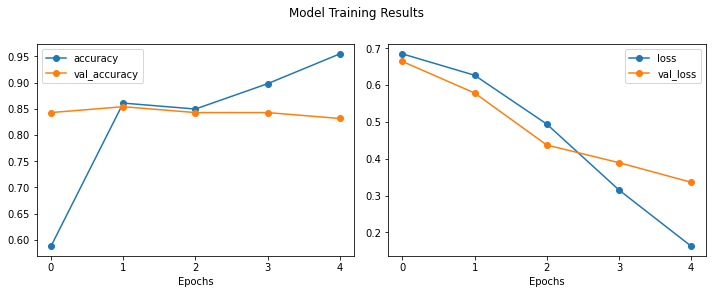



------------------------------------------------------------
	CLASSIFICATION REPORT:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.76      0.77        49
           1       0.88      0.90      0.89        98

    accuracy                           0.85       147
   macro avg       0.83      0.83      0.83       147
weighted avg       0.85      0.85      0.85       147



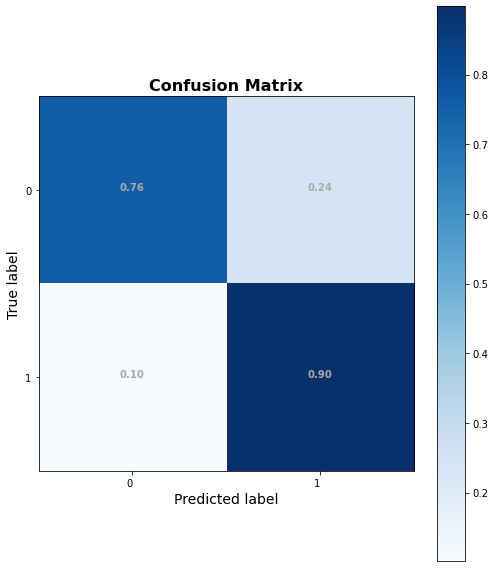

In [40]:
EMBEDDING_SIZE = 128 #where codealong get this?

model=Sequential()

model.add(Embedding(MAX_WORDS, EMBEDDING_SIZE))
model.add(LSTM(50,return_sequences=False))


# model.add(GlobalMaxPool1D()) 
# model.add(Dropout(0.5))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',#'categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, epochs=5,
                    batch_size=32, validation_split=0.2,
                   class_weight=weights_dict)

y_hat_test = model.predict_classes(X_test)
# print(pd.Series(y_hat_test).value_counts())
kg.evaluate_model(y_test,y_hat_test,history)

## Using Glove In Embedding Layer

In [41]:
embedding_layer = model_glove.get_keras_embedding()
embedding_layer

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 50)          59675700  
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 25)          7600      
_________________________________________________________________
global_max_pooling1d (Global (None, 25)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 52        
Total params: 59,684,002
Trainable params: 8,302
Non-trainable params: 59,675,700
______________________________________

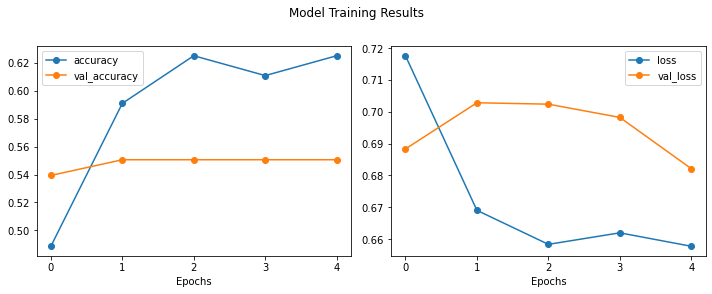



------------------------------------------------------------
	CLASSIFICATION REPORT:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.67      1.00      0.80        98

    accuracy                           0.67       147
   macro avg       0.33      0.50      0.40       147
weighted avg       0.44      0.67      0.53       147



/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



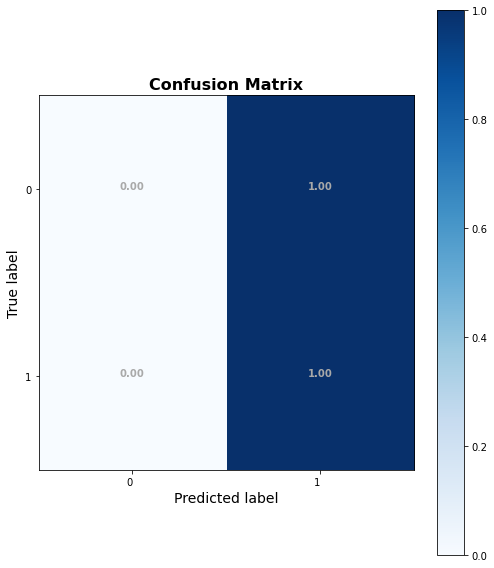

In [42]:
model=Sequential()
model.add(embedding_layer)
model.add(LSTM(25,return_sequences=True))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(25, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',#'categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

y_hat_test = model.predict_classes(X_test)
# print(pd.Series(y_hat_test).value_counts())
kg.evaluate_model(y_test,y_hat_test,history)

### Alternative Approach to Loading in Glove

In [43]:

# EMBEDDING_SIZE = 128 #where codealong get this?

# embedding_matrix = np.zeros((len(total_vocabulary) + 1, EMBEDDING_SIZE))
# for word, i in enumerate(total_vocabulary):#.items():
#     embedding_vector = glove.get(word)
#     if embedding_vector is not None:
#         # words not found in embedding index will be all-zeros.
#         embedding_matrix[i] = embedding_vector
        
        
# embedding_layer = Embedding(len(total_vocabulary) + 1,
#                             EMBEDDING_SIZE,
#                             weights=[embedding_matrix],
#                             input_length=MAX_SEQUENCE_LENGTH,
#                             trainable=True)

## RNN or GRU

In [44]:
## GRU Model
from keras import models, layers, optimizers, regularizers
modelG = models.Sequential()

## Get and add embedding_layer
# embedding_layer = ji.make_keras_embedding_layer(wv, X_train)
modelG.add(Embedding(MAX_WORDS, EMBEDDING_SIZE))

# modelG.add(layers.SpatialDropout1D(0.5))
# modelG.add(layers.Bidirectional(layers.GRU(units=100, dropout=0.5, recurrent_dropout=0.2,return_sequences=True)))
modelG.add(layers.Bidirectional(layers.GRU(units=100, dropout=0.5, recurrent_dropout=0.2)))
modelG.add(layers.Dense(2, activation='softmax'))

modelG.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['acc'])#,'val_acc'])#, callbacks=callbacks)
modelG.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         3200000   
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               138000    
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 402       
Total params: 3,338,402
Trainable params: 3,338,402
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
11/11 [==============================] - 1s 127ms/step - loss: 0.6596 - acc: 0.6108 - val_loss: 0.6780 - val_acc: 0.5506
Epoch 2/10
11/11 [==============================] - 1s 83ms/step - loss: 0.5717 - acc: 0.6960 - val_loss: 0.4883 - val_acc: 0.8876
Epoch 3/10
11/11 [==============================] - 1s 76ms/step - loss: 0.3481 - acc: 0.8494 - val_loss: 0.3542 - val_acc: 0.8876
Epoch 4/10
11/11 [==============================] - 1s 78ms/step - loss: 0.2140 - acc: 0.9119 - val_loss: 0.3590 - val_acc: 0.8427
Epoch 5/10
11/11 [==============================] - 1s 81ms/step - loss: 0.1408 - acc: 0.9688 - val_loss: 0.4475 - val_acc: 0.8652
Epoch 6/10
11/11 [==============================] - 1s 76ms/step - loss: 0.0643 - acc: 0.9830 - val_loss: 0.4275 - val_acc: 0.8539
Epoch 7/10
11/11 [==============================] - 1s 75ms/step - loss: 0.0348 - acc: 0.9915 - val_loss: 0.5598 - val_acc: 0.8764
Epoch 8/10
11/11 [==============================] - 1s 72ms/step - loss: 0.0087 - 

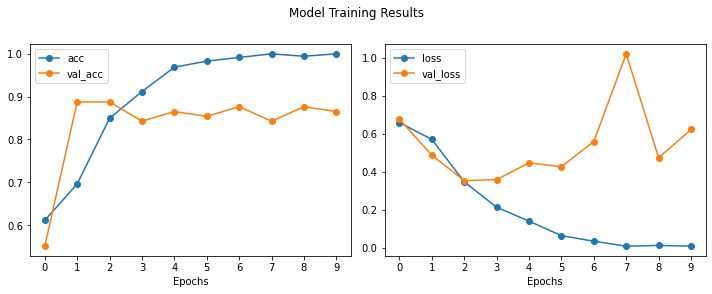



------------------------------------------------------------
	CLASSIFICATION REPORT:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.78      0.73        49
           1       0.88      0.83      0.85        98

    accuracy                           0.81       147
   macro avg       0.79      0.80      0.79       147
weighted avg       0.82      0.81      0.81       147



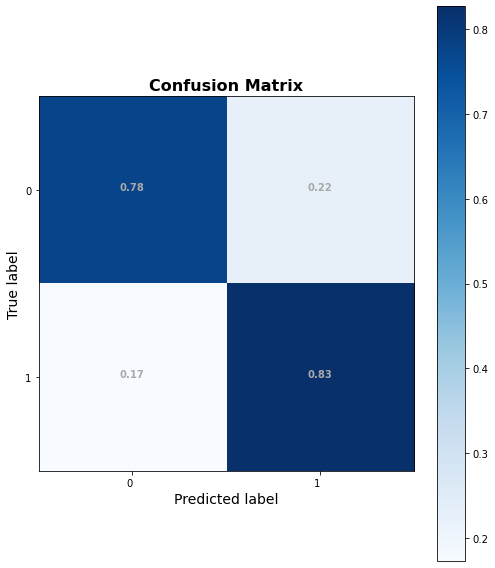

In [45]:

history = modelG.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

y_hat_test = modelG.predict_classes(X_test)
kg.evaluate_model(y_test,y_hat_test,history)

# APPENDIX

## Using Embeddings in Classification Models - sci-kit learn

- Embeddings can be used in Artificial Neural Networks as an input Embedding Layer
- Embeddings can be used in sci-kit learn models by taking the mean vector of a text/document and using the mean vector as the input into the model. 

### Creating Mean Embeddings

In [46]:
## This line of code for getting all words bugs me
total_vocabulary = set(word for tweet in data_lower for word in tweet)
len(total_vocabulary)

20963

In [47]:
glove = {}
with open(glove_file,'rb') as f:#'glove.6B.50d.txt', 'rb') as f:
    for line in f:
        parts = line.split()
        word = parts[0].decode('utf-8')
        if word in total_vocabulary:
            vector = np.array(parts[1:], dtype=np.float32)
            glove[word] = vector

In [48]:
from sklearn.model_selection import train_test_split
from nltk import word_tokenize

y = pd.get_dummies(df['is_trump'],drop_first=True).values
X = df['text'].str.lower().map(word_tokenize)

X_idx = list(range(len(X)))
train_idx,test_idx = train_test_split(X_idx,random_state=123)

X[train_idx]

created_at
2016-12-12 13:26:13    [the, f-35, program, and, cost, is, out, of, c...
2017-03-10 15:40:53    [weekly, address, -, 11:00, a.m., at, the, @, ...
2017-01-06 12:05:01    [hopefully, all, supporters, and, those, who, ...
2017-03-05 11:40:20    [who, was, it, that, secretly, said, to, russi...
2017-02-20 14:15:42    [give, the, public, a, break, -, the, fake, ne...
                                             ...                        
2016-12-22 16:50:30    [the, united, states, must, greatly, strengthe...
2017-01-29 23:28:50    [statement, regarding, recent, executive, orde...
2017-02-08 15:23:29    [thank, you, to, our, great, police, chiefs, &...
2017-02-05 20:42:33    [i, have, instructed, homeland, security, to, ...
2017-03-04 13:19:29    [arnold, schwarzenegger, is, n't, voluntarily,...
Name: text, Length: 441, dtype: object

In [49]:
def train_test_split_idx(X, y, train_idx,test_idx):
    # try count vectorized first
    X_train = X[train_idx].copy()
    y_train = y[train_idx].copy()
    X_test = X[train_idx].copy()
    y_test = y[train_idx].copy()
    return X_train, X_test,y_train, y_test

X_train, X_test,y_train, y_test = train_test_split_idx(X,y,train_idx,test_idx)

In [50]:
# df['combined_text'] = df['headline'] + ' ' + df['short_description']
# data = df['combined_text'].map(word_tokenize).values

In [51]:
class W2vVectorizer(object):
    
    def __init__(self, w2v):
        # Takes in a dictionary of words and vectors as input
        self.w2v = w2v
        if len(w2v) == 0:
            self.dimensions = 0
        else:
            self.dimensions = len(w2v[next(iter(glove))])
    
    # Note: Even though it doesn't do anything, it's required that this object implement a fit method or else
    # it can't be used in a scikit-learn pipeline  
    def fit(self, X, y):
        return self
            
    def transform(self, X):
        return np.array([
            np.mean([self.w2v[w] for w in words if w in self.w2v]
                   or [np.zeros(self.dimensions)], axis=0) for words in X])

In [52]:
# target = df['source']
# data = df['text'].map(word_tokenize)
# data_lower = list(map(lambda x: [w.lower() for w in x],data))

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

rf =  Pipeline([('Word2Vec Vectorizer', W2vVectorizer(glove)),
              ('Random Forest', RandomForestClassifier(n_estimators=100, verbose=True))])
svc = Pipeline([('Word2Vec Vectorizer', W2vVectorizer(glove)),
                ('Support Vector Machine', SVC())])
lr = Pipeline([('Word2Vec Vectorizer', W2vVectorizer(glove)),
              ('Logistic Regression', LogisticRegression())])

models = [('Random Forest', rf),
          ('Support Vector Machine', svc),
          ('Logistic Regression', lr)]
# models = {'Random Forest':RandomForestClassifier(n_estimators=100, verbose=True),
#           'SVC':SVC(),'lr':LogisticRegression()}

In [54]:
scores = [(name, cross_val_score(model, X_train, y_train, cv=2).mean()) for name, model, in models]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/pipeline.py:335: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/pipeline.py:335: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

In [55]:
scores

[('Random Forest', 0.770937885643768),
 ('Support Vector Machine', 0.7527869189633896),
 ('Logistic Regression', 0.8049876593994241)]

# sklearn NLP for Lime

In [56]:
df

,text,is_trump,target
created_at,,,
2016-12-01 14:38:09,Getting ready to leave for the Great State of ...,Trump,1
2016-12-01 22:52:10,Heading to U.S. Bank Arena in Cincinnati Ohio ...,Not Trump,0
2016-12-02 02:45:18,Thank you Ohio! Together we made history – and...,Not Trump,0
2016-12-03 00:44:20,The President of Taiwan CALLED ME today to wis...,Trump,1
2016-12-03 01:41:30,Interesting how the U.S. sells Taiwan billions...,Trump,1
...,...,...,...
2017-03-24 17:03:46,Today I was pleased to announce the official a...,Not Trump,0
2017-03-24 17:59:42,Today I was thrilled to announce a commitment ...,Not Trump,0
2017-03-25 13:29:17,Happy #MedalOfHonorDay to our heroes! ➡️https:...,Not Trump,0


In [58]:
from sklearn.preprocessing import LabelEncoder
## Train Test Split

X = df['text'].copy()
y = df['target']#.map({'decrease':0,'no change':1,'increase':2})

y.value_counts(dropna=False,normalize=True)

1    0.619048
0    0.380952
Name: target, dtype: float64

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=42)
X_train.shape

(441,)

In [60]:
y_train.value_counts(1)

1    0.614512
0    0.385488
Name: target, dtype: float64

In [61]:
X_train

created_at
2017-01-18 12:34:09    Totally biased @NBCNews went out of its way to...
2016-12-05 23:06:43    #ThankYouTour2016 12/6- North Carolinahttps://...
2017-02-14 21:48:10    'Remarks by President Trump at Signing of H.J....
2016-12-27 02:53:20    I gave millions of dollars to DJT Foundation r...
2016-12-20 13:03:59    Bill Clinton stated that I called him after th...
                                             ...                        
2016-12-15 14:24:29    If Russia or some other entity was hacking why...
2016-12-24 00:13:02    Vladimir Putin said today about Hillary and De...
2017-01-20 17:54:36    We will bring back our jobs. We will bring bac...
2017-02-15 19:45:16    Join me in Florida this Saturday at 5pm for a ...
2016-12-23 11:58:36    my presidency. Isn't this a ridiculous shame? ...
Name: text, Length: 441, dtype: object

In [62]:
import nltk,string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
stopwords_list = stopwords.words('english')
stopwords_list+=string.punctuation

In [63]:
tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False)

## Make TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=False,tokenizer=tokenizer.tokenize,
                            stop_words=stopwords_list)
# vectorizer.fit_transform(X_train)

In [64]:
# Make X_train_tfidf and X_test_tfidf
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
X_train_tfidf

<441x2181 sparse matrix of type '<class 'numpy.float64'>'
	with 4985 stored elements in Compressed Sparse Row format>

In [65]:
from sklearn import metrics
import matplotlib.pyplot as plt
# my_scorer = metrics.make_scorer(evaluate_model,)

def evaluate_model(y_test,y_hat_test,X_test,clf=None,
                  scoring=metrics.recall_score,verbose=False,
                  scorer=False,classes=['Not Trump','Trump']):
    
    if classes is None:
        if len(np.unique(y_test))==3:
            
            classes=['Decrease','No Change', 'Increase']
        else:
            classes = ['Decrease', 'Increase']
        

    print(metrics.classification_report(y_test,y_hat_test,
                                        target_names=classes))
    
    metrics.plot_confusion_matrix(clf,X_test,y_test,normalize='true',
                                 cmap='Blues',display_labels=classes)
    plt.show()
    if verbose:
        print("MODEL PARAMETERS:")
        print(pd.Series(rf.get_params()))
        
    if scorer:
        
        return scoring(y_test,y_hat_test)
    

### DummyClassifier

              precision    recall  f1-score   support

   Not Trump       0.39      0.43      0.41        54
       Trump       0.65      0.61      0.63        93

    accuracy                           0.54       147
   macro avg       0.52      0.52      0.52       147
weighted avg       0.55      0.54      0.55       147



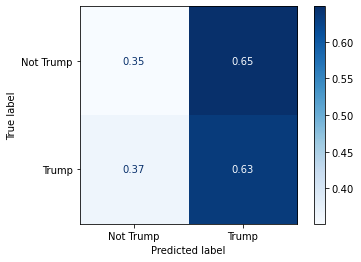

In [69]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()#strategy='most_frequent')
dummy.fit(X_train_tfidf,y_train)

## Get predictions
y_hat_test = dummy.predict(X_test_tfidf)
y_hat_train = dummy.predict(X_train_tfidf)
evaluate_model(y_test,y_hat_test,X_test_tfidf,dummy)

### RandomForest

              precision    recall  f1-score   support

   Not Trump       0.81      0.70      0.75        54
       Trump       0.84      0.90      0.87        93

    accuracy                           0.83       147
   macro avg       0.82      0.80      0.81       147
weighted avg       0.83      0.83      0.83       147



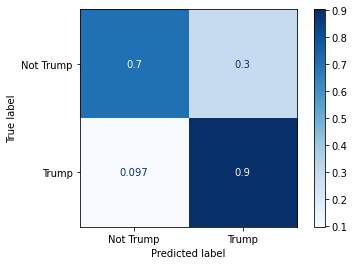

In [70]:
from sklearn.ensemble import RandomForestClassifier
## Make and fit a random forest
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train_tfidf,y_train)

## Get predictions
y_hat_test = rf.predict(X_test_tfidf)
y_hat_train = rf.predict(X_train_tfidf)

## Evaluate MOdel
evaluate_model(y_test,y_hat_test,X_test_tfidf,rf)

### GridSearch RF

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer

tokenizer = nltk.TweetTokenizer(preserve_case=False)
vectorizer = TfidfVectorizer()#tokenizer=tokenizer.tokenize,
#                             stop_words=stopwords_list)
rf_pipe = Pipeline(steps=[
    ('vectorizer',vectorizer),
    ('rf',RandomForestClassifier(class_weight='balanced'))
])
rf_pipe

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('rf', RandomForestClassifier(class_weight='balanced'))])

In [72]:
params = {'vectorizer__tokenizer':[None,tokenizer.tokenize],
         'vectorizer__stop_words':[None,stopwords_list],
         'vectorizer__use_idf':[True,False],
          'vectorizer__smooth_idf':[True,False]}

grid = GridSearchCV(rf_pipe, params,cv=3,n_jobs=-1)#,scoring='recall_macro')
grid

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('rf',
                                        RandomForestClassifier(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'vectorizer__smooth_idf': [True, False],
                         'vectorizer__stop_words': [None,
                                                    ['i', 'me', 'my', 'myself',
                                                     'we', 'our', 'ours',
                                                     'ourselves', 'you',
                                                     "you're", "you've",
                                                     "you'll", "you'd", 'your',
                                                     'yours', 'yourself',
                                                     'yourselves', 'he', 'him',
                                                     'his', 'himself', 'she',
         

In [73]:
grid.fit(X_train,y_train)
grid.best_params_

{'vectorizer__smooth_idf': True,
 'vectorizer__stop_words': ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into',
  'through',
  'during',
  'before',
  'after',
  'above',
  'below',
  'to',
  'from',
  'up',
  'down',
  'in',
  'out',
  'on',


In [74]:
target_map

{'Not Trump': 0, 'Trump': 1}

In [75]:
# trump_classes = ['Not Trump','Trump']

              precision    recall  f1-score   support

   Not Trump       0.97      0.72      0.83        54
       Trump       0.86      0.99      0.92        93

    accuracy                           0.89       147
   macro avg       0.92      0.86      0.87       147
weighted avg       0.90      0.89      0.89       147



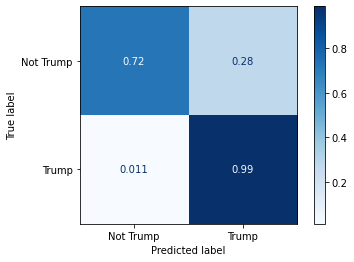

In [76]:
best_pipe = grid.best_estimator_
y_hat_test = best_pipe.predict(X_test)
evaluate_model(y_test,y_hat_test,X_test,best_pipe)

# LIME TEXT EXPLAINER


# Explaining NLP With Lime

- Easy to use with sklearn models:
    - https://towardsdatascience.com/explain-nlp-models-with-lime-shap-5c5a9f84d59b
    - https://towardsdatascience.com/explain-nlp-models-with-lime-shap-5c5a9f84d59b
    - [Lime TextClassification Tutorial](https://marcotcr.github.io/lime/tutorials/Lime%20-%20multiclass.html)


- Some hoops to jump through for ANNs:
    - https://data4thought.com/deep-lime.html

In [77]:
# !pip install -U lime
import lime 
from lime import lime_text

In [78]:
class_map = {0:'Not Trump',1:'Trump'}

In [79]:
i = np.random.choice(range(len(y_train)))
print(f'For row {i}, Actual Class =',class_map[y_train[i]])
print(X_train[i])

For row 217, Actual Class = Trump
...design or negotiations yet. When I do just like with the F-35 FighterJet or the Air Force One Program price will come WAY DOWN!


In [80]:
i = np.random.choice(range(len(y_train)))
print('Actual Class =',y_train[i])
explainer = lime_text.LimeTextExplainer(class_names=['Staffer','Trump'])
exp = explainer.explain_instance(X_train[i], best_pipe.predict_proba, labels=[ 1])

exp.show_in_notebook(text=True)

Actual Class = 1


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/lime/lime_text.py:114: FutureWarning:

split() requires a non-empty pattern match.

